<a href="https://colab.research.google.com/github/HermanMoreno98/Machine_Learning/blob/main/Regresi%C3%B3n_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando librerias

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
# Delete files if exist data inside 
from shutil import rmtree
import shutil

# Manejo de carpetas en el directorio

In [25]:
#Directorio actual
os.getcwd()

'/content'

In [ ]:
# Listar archivos dentro de un directorio
os.listdir()

['.config', 'drive', 'sample_data']

In [ ]:
# Crear carpeta
os.mkdir("/content/drive/MyDrive/CURSOS/MACHINE LEARNING/Data/HousePrice")

In [ ]:
#Cambiar de directorio
os.chdir("/content/drive/MyDrive/CURSOS/MACHINE LEARNING/Data/HousePrice")

In [ ]:
from google.colab import files
files.upload();

Saving kaggle.json to kaggle.json


In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d shree1992/housedata

  0% 0.00/432k [00:00<?, ?B/s]
100% 432k/432k [00:00<00:00, 7.85MB/s]


In [ ]:
! unzip housedata.zip

Archive:  housedata.zip
  inflating: data.csv                
  inflating: data.dat                
  inflating: output.csv              


In [ ]:
final_route = "/content/drive/MyDrive/CURSOS/MACHINE LEARNING/Data/"
shutil.move("data.csv", final_route)

'/content/drive/MyDrive/CURSOS/MACHINE LEARNING/Data/data.csv'

In [ ]:
#Cambiar de directorio
os.chdir("/content/drive/MyDrive/CURSOS/MACHINE LEARNING/Data/")

In [ ]:
#Cambiar nombre de archivo
old_file = "data.csv"
new_file = "house_price_data.csv"
os.rename(old_file, new_file)

In [ ]:
#Eliminar directorio
rmtree("HousePrice")

# Cargando dataset

In [26]:
#Cambiar de directorio
os.chdir("/content/drive/MyDrive/CURSOS/MACHINE LEARNING/")

In [3]:
pddf = pd.read_csv('Data/house_price_data.csv')
target = 'price'
pddf.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
pddf.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,year,ant_built,ant_renovated,price_t
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.0,4600.000000,1865.000000,4.600000e+03
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261,2014.0,43.213696,19.577480,5.378241e+05
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536,0.0,29.731848,21.372401,3.279080e+05
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,2014.0,0.000000,0.000000,0.000000e+00
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,2014.0,17.000000,8.000000,3.228750e+05
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000,2014.0,38.000000,13.000000,4.609435e+05
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000,2014.0,63.000000,24.000000,6.549625e+05
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000,2014.0,114.000000,102.000000,2.004243e+06


In [ ]:
np.percentile(pddf.price,2)

142486.0

In [4]:
#Analizar valores incoherentes del target
pddf = pddf.loc[pddf.price >= 10000]

In [5]:
#Creando algunas variables
pddf['year'] = pddf.date.apply(lambda x: int(x[:4]))
pddf['ant_built'] = pddf.year - pddf.yr_built
pddf['ant_renovated'] = pddf.year - pddf.yr_renovated.apply(lambda x: None if x==0 else x)

<Axes: >

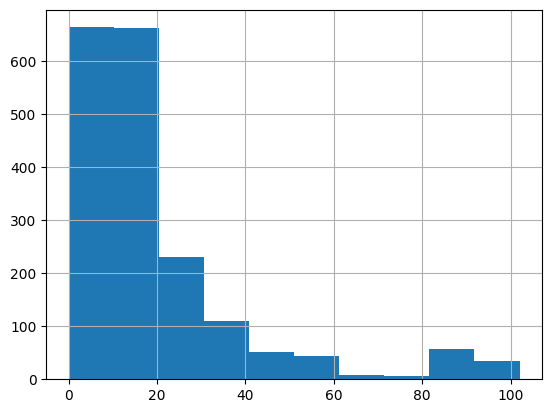

In [ ]:
pddf.ant_renovated.hist()

In [6]:
#Por el momento, sólo nos quedamos con variables numericas
pddf.select_dtypes(include='object').columns.tolist()

['date', 'street', 'city', 'statezip', 'country']

In [7]:
features = list(set(pddf.columns.tolist()) - set(['price','year','yr_built','yr_renovated']+pddf.select_dtypes(include='object').columns.tolist()))
data = pddf[features + [target]]

In [ ]:
data.head()

,ant_renovated,waterfront,ant_built,sqft_lot,floors,sqft_basement,sqft_above,view,sqft_living,bathrooms,condition,bedrooms,price
0,9.0,0,59,7912,1.5,0,1340,0,1340,1.50,3,3.0,313000.0
1,NaN,0,93,9050,2.0,280,3370,4,3650,2.50,5,5.0,2384000.0
2,NaN,0,48,11947,1.0,0,1930,0,1930,2.00,4,3.0,342000.0
3,NaN,0,51,8030,1.0,1000,1000,0,2000,2.25,4,3.0,420000.0
4,22.0,0,38,10500,1.0,800,1140,0,1940,2.50,4,4.0,550000.0


# Seleccion de muestras

In [8]:
# Muestreo
from sklearn.model_selection import train_test_split

train,test = train_test_split(data,
                              train_size=0.7,
                              random_state=123)

In [ ]:
print(f"Total data size {data.shape}")
print(f"Total train size {train.shape}")
print(f"Total test size {test.shape}")

Total data size (4550, 13)
Total train size (3185, 13)
Total test size (1365, 13)


# Analisis univariado de datos

<Axes: xlabel='bathrooms', ylabel='price'>

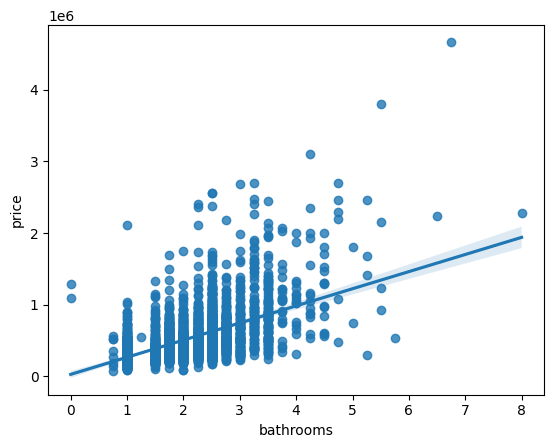

In [9]:
#sns.relplot(x="bathrooms",y="price",data=train.loc[train.price<5000000])
sns.regplot(x="bathrooms",y="price",data=train.loc[train.price<5000000])

In [10]:
univariate = train.describe().transpose()
univariate.reset_index(inplace=True)

In [11]:
#Cambiando nombre de las variables
univariate.rename(columns={
  'index':'feature',
  '25%':'Q1',
  '50%':'Q2',
  '75%':'Q3'
},inplace=True)

In [12]:
#Creando columna de número de missings
univariate['missing_rate'] = 1 - univariate['count'] / train.shape[0]

In [13]:
#Ordenando el dataframe por 'missing_rate'
univariate.sort_values(by='missing_rate',ascending=False, inplace=True)

#¿Que hacer con la variable 'ant_renovated' que tiene un 60% de missing?

In [14]:
univariate.head()

,feature,count,mean,std,min,Q1,Q2,Q3,max,missing_rate
2,ant_renovated,1260.0,19.326984,21.292906,0.0,8.0,13.0,22.0,102.0,0.604396
0,sqft_above,3185.0,1819.907064,848.854618,370.0,1200.0,1590.0,2290.0,9410.0,0.000000
1,sqft_lot,3185.0,14883.002512,33628.812210,746.0,5002.0,7715.0,10962.0,641203.0,0.000000
3,waterfront,3185.0,0.006593,0.080944,0.0,0.0,0.0,0.0,1.0,0.000000
4,condition,3185.0,3.453689,0.674700,1.0,3.0,3.0,4.0,5.0,0.000000


In [15]:
# Analisis de correlaciones
corr_matrix = train.corr()
corr_matrix.reset_index(inplace=True)
corr_matrix.rename(columns={'index':'feature',target:'correl'},inplace=True)
corr_matrix = corr_matrix[['feature','correl']]
corr_matrix.head()

,feature,correl
0,sqft_above,0.335910
1,sqft_lot,0.048334
2,ant_renovated,0.039901
3,waterfront,0.154196
4,condition,0.031435


In [16]:
#Cruce para obtener las variables más importantes que se relacionan con el target
univariate_II = pd.merge(univariate,corr_matrix,on='feature',how='inner')
univariate_II['correl_abs'] = univariate_II.correl.apply(lambda x: abs(x))
univariate_II.sort_values(by='correl_abs', ascending=False, inplace=True)
univariate_II.head()

,feature,count,mean,std,min,Q1,Q2,Q3,max,missing_rate,correl,correl_abs
12,price,3185.0,559046.654641,627775.352934,80000.0,329350.00,465000.00,650000.0,26590000.0,0.0,1.000000,1.000000
10,sqft_living,3185.0,2134.329356,951.982266,370.0,1470.00,1980.00,2600.0,13540.0,0.0,0.396258,0.396258
1,sqft_above,3185.0,1819.907064,848.854618,370.0,1200.00,1590.00,2290.0,9410.0,0.0,0.335910,0.335910
5,bathrooms,3185.0,2.163658,0.774415,0.0,1.75,2.25,2.5,8.0,0.0,0.303729,0.303729
7,view,3185.0,0.236735,0.766261,0.0,0.00,0.00,0.0,4.0,0.0,0.225895,0.225895


<Axes: xlabel='sqft_living', ylabel='price'>

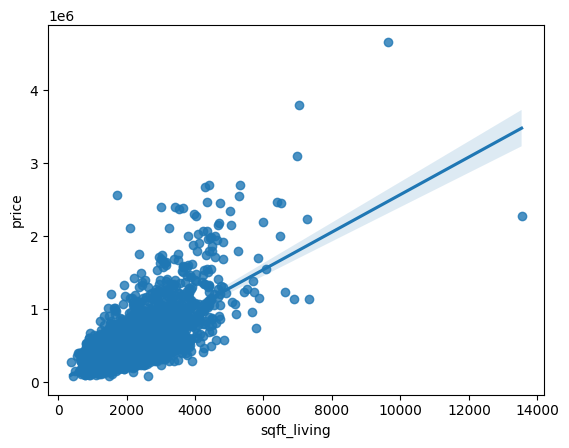

In [17]:
# Se evidencia algunos outliers
sns.regplot(x="sqft_living",y="price",data=train.loc[train.price<5000000])

# Pre-selección de variables

Es importante en esta etapa identificar aquellos features con mayor potencial para predecir el target. Se pueden establecer umbrales como por ejm, excluir corr<0.1 y missing_rate>0.9

In [18]:
feature_prefilter = list(set(univariate_II.loc[(univariate_II.correl_abs>=0.1) & (univariate_II.missing_rate<=0.9)].feature.tolist()) - set([target]))

In [19]:
print(f"# de variables iniciales {univariate_II.shape[0]}")
print(f"# de variables finales {len(feature_prefilter)}")

# de variables iniciales 13
# de variables finales 8


# Analizando el target

In [ ]:
pddf.price.describe()

count    4.550000e+03
mean     5.580268e+05
std      5.639329e+05
min      8.000000e+04
25%      3.264464e+05
50%      4.650000e+05
75%      6.575000e+05
max      2.659000e+07
Name: price, dtype: float64

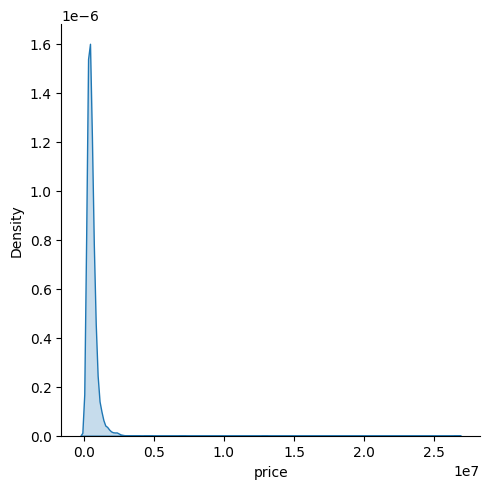

In [20]:
sns.displot(pddf.price, kind="kde", fill=True)

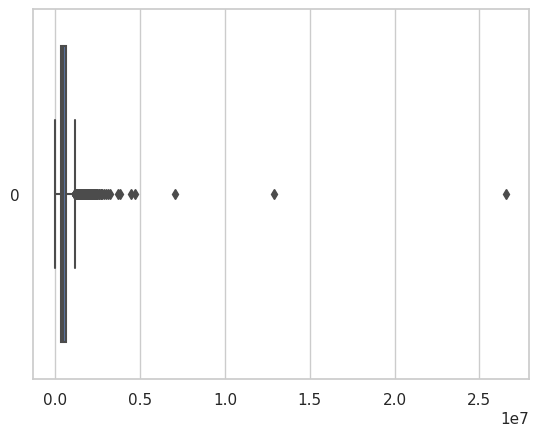

In [ ]:
#Boxplot
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=pddf.price, orient="h")

# Tratamiento de outliers del target por z-score (CAPPING)

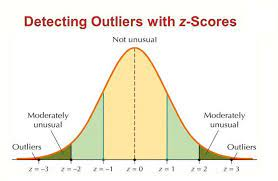

In [21]:
# Tratamiento por z-score (99% de confianza) -> Capping: truncar los valores extremos consiste en imputar los valores limites.
# 99% confianza -> z=2.576
# 95% confianza -> z=1.96
# 90% confianza -> z=1.64
# Asume que los datos siguen una distribucion normal
upper_limit = np.mean(pddf.price) + 1.96*np.std(pddf.price)
lower_limit = np.mean(pddf.price) - 1.96*np.std(pddf.price)

pddf["price_t"] = pddf.price.apply(lambda x: upper_limit if x > upper_limit
                 else lower_limit if x < lower_limit else x)

In [ ]:
#El valor del lower limit se va muy a la izquierda debido a la desviacion estandar, porque justamente el tratamient por z-score asume una dist. normal
lower_limit

-547160.1348601585

In [ ]:
np.mean(pddf.price)

558026.8015333592

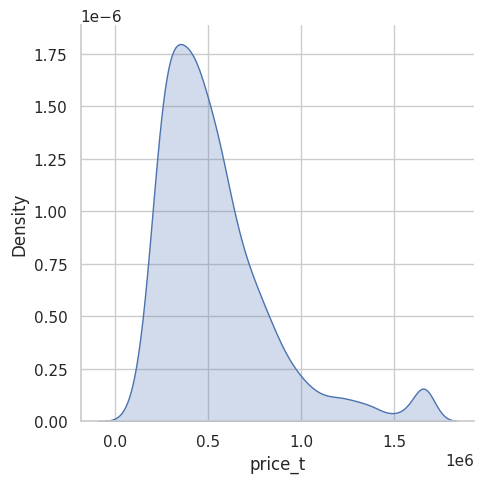

In [ ]:
sns.displot(pddf.price_t, kind="kde", fill=True)

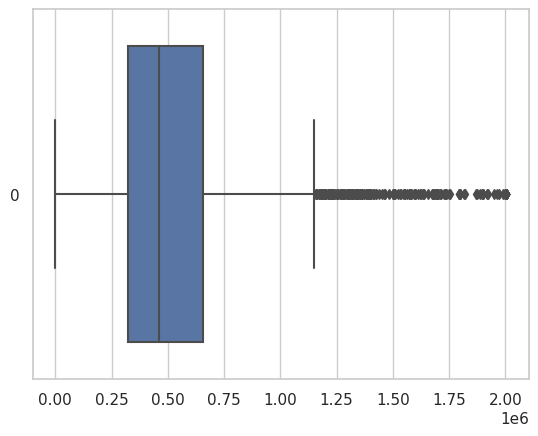

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=pddf.price_t, orient="h")

<Axes: >

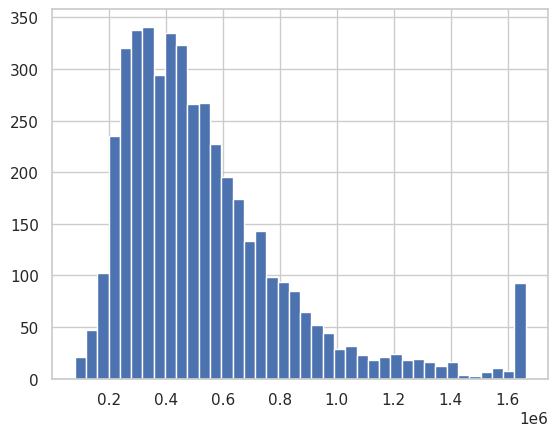

In [ ]:
pddf.price_t.hist(bins=40)

## Tratamiento por z-score de los faetures


In [22]:
#Calculando los intervalos
univariate_II["li_zscore"] = univariate_II["mean"] - 1.96*univariate_II["std"]
univariate_II["ls_zscore"] = univariate_II["mean"] + 1.96*univariate_II["std"]

univariate_II.head()

,feature,count,mean,std,min,Q1,Q2,Q3,max,missing_rate,correl,correl_abs,li_zscore,ls_zscore
12,price,3185.0,559046.654641,627775.352934,80000.0,329350.00,465000.00,650000.0,26590000.0,0.0,1.000000,1.000000,-671393.037110,1.789486e+06
10,sqft_living,3185.0,2134.329356,951.982266,370.0,1470.00,1980.00,2600.0,13540.0,0.0,0.396258,0.396258,268.444116,4.000215e+03
1,sqft_above,3185.0,1819.907064,848.854618,370.0,1200.00,1590.00,2290.0,9410.0,0.0,0.335910,0.335910,156.152013,3.483662e+03
5,bathrooms,3185.0,2.163658,0.774415,0.0,1.75,2.25,2.5,8.0,0.0,0.303729,0.303729,0.645804,3.681512e+00
7,view,3185.0,0.236735,0.766261,0.0,0.00,0.00,0.0,4.0,0.0,0.225895,0.225895,-1.265136,1.738605e+00


In [23]:
def calculate_zscore(dataframe,univariate,features_treatment):
  for col in features_treatment:
    desc = univariate.loc[univariate.feature==col]
    dataframe[col + "_tzscore"] = dataframe[col].apply(lambda x: desc.ls_zscore.values[0] if x > desc.ls_zscore.values[0]
                                                     else desc.li_zscore.values[0] if x < desc.li_zscore.values[0]
                                                     else x)
  return dataframe

In [24]:
train_I = calculate_zscore(train,univariate_II,univariate_II.feature.tolist())
test_I = calculate_zscore(test,univariate_II,univariate_II.feature.tolist())

In [ ]:
#Generacion de graficos

# Crear carpeta
os.mkdir("/graficos")

sns.set(rc={"figure.figsize":(6,4)})
featuresTograph = [x+"_tzscore" for x in feature_prefilter]
i=0
for col in featuresTograph:
  i += 1
  print(f"Graficando {col} ({i}/{len(featuresTograph)})")
  sns.jointplot(x=col,y=target+"_tzscore",data=train_I.sample(500),kind="reg",truncate=False,color="m",height=7).savefig(f"graficos/scatter {col}.jpg")

# Tratamiento de missings

In [33]:
train_II = train_I[[x+"_tzscore" for x in feature_prefilter]].fillna(train_I[[x+"_tzscore" for x in feature_prefilter]].median())
test_II = test_I[[x+"_tzscore" for x in feature_prefilter]].fillna(test_I[[x+"_tzscore" for x in feature_prefilter]].median())

# Estandarizacion

Consiste en cambiarle la escala a las variables a una distribucion con media cero y desviacion estandar de 1


```
x_estandar = ( x - x.mean() ) / x.std()
```




In [34]:
train_III = (train_II - train_II.mean()) / train_II.std()
test_III = (test_II - test_II.mean()) / test_II.std()

In [36]:
train_III.describe()

,sqft_above_tzscore,waterfront_tzscore,bathrooms_tzscore,floors_tzscore,view_tzscore,sqft_basement_tzscore,sqft_living_tzscore,bedrooms_tzscore
count,3.185000e+03,3.185000e+03,3.185000e+03,3.185000e+03,3.185000e+03,3.185000e+03,3.185000e+03,3.185000e+03
mean,-2.409376e-16,3.346355e-17,2.359180e-16,-4.941451e-16,-5.354168e-17,-4.461807e-17,-3.085618e-16,-7.997789e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.892278e+00,-8.145603e-02,-2.097275e+00,-9.791721e-01,-3.284248e-01,-7.167225e-01,-2.091581e+00,-2.106454e+00
25%,-7.841015e-01,-8.145603e-02,-5.522575e-01,-9.791721e-01,-3.284248e-01,-7.167225e-01,-7.615355e-01,-4.715942e-01
50%,-2.633922e-01,-8.145603e-02,1.473542e-01,2.262161e-03,-3.284248e-01,-7.167225e-01,-1.448782e-01,-4.715942e-01
75%,6.712143e-01,-8.145603e-02,4.971600e-01,9.836964e-01,-3.284248e-01,7.698516e-01,6.047835e-01,7.246261e-01
max,2.264935e+00,1.227271e+01,2.150359e+00,2.107738e+00,3.194651e+00,2.226637e+00,2.297828e+00,2.138269e+00


# Regresion lineal

In [37]:
import statsmodels.api as sm

#Minimos cuadrados ordinarios
mod = sm.OLS(train_I[[target + "_tzscore"]],
             sm.add_constant(train_III))
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          price_tzscore   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     416.7
Date:                Fri, 19 May 2023   Prob (F-statistic):               0.00
Time:                        17:01:38   Log-Likelihood:                -43650.
No. Observations:                3185   AIC:                         8.732e+04
Df Residuals:                    3176   BIC:                         8.737e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   5.39e+

In [38]:
#Quitando la variable "bathrooms_tzscore"
variables_mod = list(set(train_III.columns.tolist()) - set(["bathrooms_tzscore"]))

mod = sm.OLS(train_I[[target + "_tzscore"]],
             sm.add_constant(train_III[variables_mod]))
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          price_tzscore   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     476.3
Date:                Fri, 19 May 2023   Prob (F-statistic):               0.00
Time:                        17:09:37   Log-Likelihood:                -43650.
No. Observations:                3185   AIC:                         8.732e+04
Df Residuals:                    3177   BIC:                         8.736e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   5.39e+

In [39]:
#Observar la coherencia de los signos que tienen parámetros
#Se retira "bedrooms_tzscore" porque va en sentido contrario con el target (relacion negativa)
variables_mod = list(set(train_III.columns.tolist()) - set(["bathrooms_tzscore","bedrooms_tzscore"]))

mod = sm.OLS(train_I[[target + "_tzscore"]],
             sm.add_constant(train_III[variables_mod]))
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          price_tzscore   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     540.8
Date:                Fri, 19 May 2023   Prob (F-statistic):               0.00
Time:                        17:13:32   Log-Likelihood:                -43672.
No. Observations:                3185   AIC:                         8.736e+04
Df Residuals:                    3178   BIC:                         8.740e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   5.39e+

In [41]:
#Importancia de las variables (siempre y cuando los datos estan estandarizados, es decir, en la misma escala)
modelo = pd.DataFrame({"coeficiente":res.params})
modelo.reset_index(inplace=True)
modelo.rename(columns={"index":"feature"},inplace=True)
modelo = modelo.loc[modelo.feature!="const"]
modelo["peso"] = modelo.coeficiente / modelo.coeficiente.sum()
modelo.sort_values(by="peso",ascending=False,inplace=True)
modelo
#32% del modelo está explicado por que tan grande es el living

,feature,coeficiente,peso
3,sqft_living_tzscore,104525.534115,0.320504
4,sqft_above_tzscore,71198.432896,0.218314
5,view_tzscore,53745.548822,0.164798
6,sqft_basement_tzscore,46555.621795,0.142752
2,waterfront_tzscore,25189.327451,0.077237
1,floors_tzscore,24914.636578,0.076395


# Correlaciones

In [44]:
# Poner un umbral de correlacion, por ejm: 50% es el maximo aceptable de correlacion entre variables
# En el modelo se ve que "sqft_above_tzscore" y "sqft_living_tzscore" tienen una corr mayor a 0.8, por ende se retira la que tiene menor peso
# en el modelo, que es "sqft_above_tzscore"
train_III[variables_mod].corr()

,floors_tzscore,waterfront_tzscore,sqft_living_tzscore,sqft_above_tzscore,view_tzscore,sqft_basement_tzscore
floors_tzscore,1.000000,0.000738,0.376946,0.579654,0.019359,-0.289357
waterfront_tzscore,0.000738,1.000000,0.071874,0.049413,0.260305,0.065665
sqft_living_tzscore,0.376946,0.071874,1.000000,0.858863,0.283302,0.380818
sqft_above_tzscore,0.579654,0.049413,0.858863,1.000000,0.154690,-0.125715
view_tzscore,0.019359,0.260305,0.283302,0.154690,1.000000,0.292287
sqft_basement_tzscore,-0.289357,0.065665,0.380818,-0.125715,0.292287,1.000000


In [45]:
variables_mod = list(set(train_III.columns.tolist()) - set(["bathrooms_tzscore","bedrooms_tzscore","sqft_above_tzscore"]))

mod = sm.OLS(train_I[[target + "_tzscore"]],
             sm.add_constant(train_III[variables_mod]))
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          price_tzscore   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     646.3
Date:                Fri, 19 May 2023   Prob (F-statistic):               0.00
Time:                        17:28:47   Log-Likelihood:                -43676.
No. Observations:                3185   AIC:                         8.736e+04
Df Residuals:                    3179   BIC:                         8.740e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   5.39e+

In [46]:
train_III[variables_mod].corr()

,floors_tzscore,waterfront_tzscore,sqft_living_tzscore,view_tzscore,sqft_basement_tzscore
floors_tzscore,1.000000,0.000738,0.376946,0.019359,-0.289357
waterfront_tzscore,0.000738,1.000000,0.071874,0.260305,0.065665
sqft_living_tzscore,0.376946,0.071874,1.000000,0.283302,0.380818
view_tzscore,0.019359,0.260305,0.283302,1.000000,0.292287
sqft_basement_tzscore,-0.289357,0.065665,0.380818,0.292287,1.000000


# Evaluacion en test

In [48]:
train_VI = sm.add_constant(train_III[variables_mod])
test_VI = sm.add_constant(test_III[variables_mod])

train_VI["prediction"] = res.predict(train_VI)
test_VI["prediction"] = res.predict(test_VI)

train_VI[target + "_tzscore"] = train_I[[target + "_tzscore"]]
test_VI[target + "_tzscore"] = test_I[[target + "_tzscore"]]

In [50]:
from sklearn.metrics import r2_score

In [62]:
#El R2 se parece en ambos (test y treain) lo que indica que no hay overfitting
print(f'R2 en train: {r2_score(train_VI[target+"_tzscore"],train_VI.prediction)}')
print(f'R2 en test: {r2_score(test_VI[target+"_tzscore"],test_VI.prediction)}')

R2 en train: 0.5040958272897036
R2 en test: 0.4836982525797354


In [63]:
test_VI[["prediction", target + "_tzscore"]].head()

,prediction,price_tzscore
2039,542013.434439,809950.0
3215,457760.308916,437000.0
2457,827506.837118,622500.0
3053,500068.964170,550000.0
822,322128.966957,238000.0


In [68]:
test_VI["error"] = test_VI["prediction"] - test_VI[target+"_tzscore"]

#Relativizando el error
test_VI["error_rel"] = test_VI["error"]/test_VI[target+"_tzscore"]
test_VI[["prediction",target+"_tzscore","error_rel"]] 
# Si el inmueble valoa 8 mil, el error que de 33% a la baja

,prediction,price_tzscore,error_rel
2039,5.420134e+05,8.099500e+05,-0.330806
3215,4.577603e+05,4.370000e+05,0.047506
2457,8.275068e+05,6.225000e+05,0.329328
3053,5.000690e+05,5.500000e+05,-0.090784
822,3.221290e+05,2.380000e+05,0.353483
...,...,...,...
1621,4.659559e+05,5.600000e+05,-0.167936
2951,4.544354e+05,2.910000e+05,0.561634
2772,1.478547e+06,1.789486e+06,-0.173759
1161,2.784171e+05,3.200000e+05,-0.129947


In [69]:
def rango_error(x):
  if abs(x) > 0.5:
    return "Mayor a +-50%"
  elif abs(x) >= 0.25:
    return "Menor a +-50%"
  elif abs(x) < 0.25:
    return "Menor a +-25%"

In [71]:
test_VI["rango_error"] = test_VI.error_rel.apply(lambda x: rango_error(x))
test_VI

,const,floors_tzscore,waterfront_tzscore,sqft_living_tzscore,view_tzscore,sqft_basement_tzscore,prediction,price_tzscore,error,error_rel,rango_error
2039,1.0,-0.005137,-0.081439,0.166847,-0.318889,-0.697768,5.420134e+05,8.099500e+05,-267936.565561,-0.330806,Menor a +-50%
3215,1.0,-0.994657,-0.081439,-0.235200,-0.318889,0.770350,4.577603e+05,4.370000e+05,20760.308916,0.047506,Menor a +-25%
2457,1.0,0.984384,-0.081439,1.455761,-0.318889,2.067188,8.275068e+05,6.225000e+05,205006.837118,0.329328,Menor a +-50%
3053,1.0,0.984384,-0.081439,-0.223375,-0.318889,-0.697768,5.000690e+05,5.500000e+05,-49931.035830,-0.090784,Menor a +-25%
822,1.0,0.984384,-0.081439,-1.263967,-0.318889,0.036291,3.221290e+05,2.380000e+05,84128.966957,0.353483,Menor a +-50%
...,...,...,...,...,...,...,...,...,...,...,...
1621,1.0,-0.994657,-0.081439,-0.105126,-0.318889,-0.697768,4.659559e+05,5.600000e+05,-94044.061564,-0.167936,Menor a +-25%
2951,1.0,-0.994657,-0.081439,-0.270675,-0.318889,1.063974,4.544354e+05,2.910000e+05,163435.440637,0.561634,Mayor a +-50%
2772,1.0,0.984384,12.270138,2.260109,3.255515,1.749096,1.478547e+06,1.789486e+06,-310938.960537,-0.173759,Menor a +-25%
1161,1.0,-0.994657,-0.081439,-1.157543,-0.318889,-0.697768,2.784171e+05,3.200000e+05,-41582.900816,-0.129947,Menor a +-25%


In [72]:
test_VI["rango_error"].value_counts()
#De todas las predicciones, con el modelo, la mitad me equivocaré con un margen de error máximo de +- 25%

Menor a +-25%    677
Menor a +-50%    403
Mayor a +-50%    285
Name: rango_error, dtype: int64

In [74]:
677/(677+403+285)

0.495970695970696